# Correspondence Evaluation Analysis
This notebook analyzes recall metrics for different DINOv2 model checkpoints evaluated on the NAVI_wild_all dataset.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator


# Define column names explicitly
columns_scannet = [
    'timestamp', 'model', 'patch_size', 'layer', 'output_type', 'dataset',
    'num_corr', 'scale_factor',
    'recall_5px', 'recall_10px', 'recall_20px',
    'bin_0_15', 'bin_15_30', 'bin_30_60', 'bin_60_180'
]

# Read the CSV file without a header and assign column names
df = pd.read_csv('scannet_correspondence.log', header=None, names=columns_scannet)

# Extract training step from the model name
df['step'] = df['model'].str.extract(r'-(\d+)-')[0].astype(float)

# Sort by training step
df = df.sort_values(by='step')



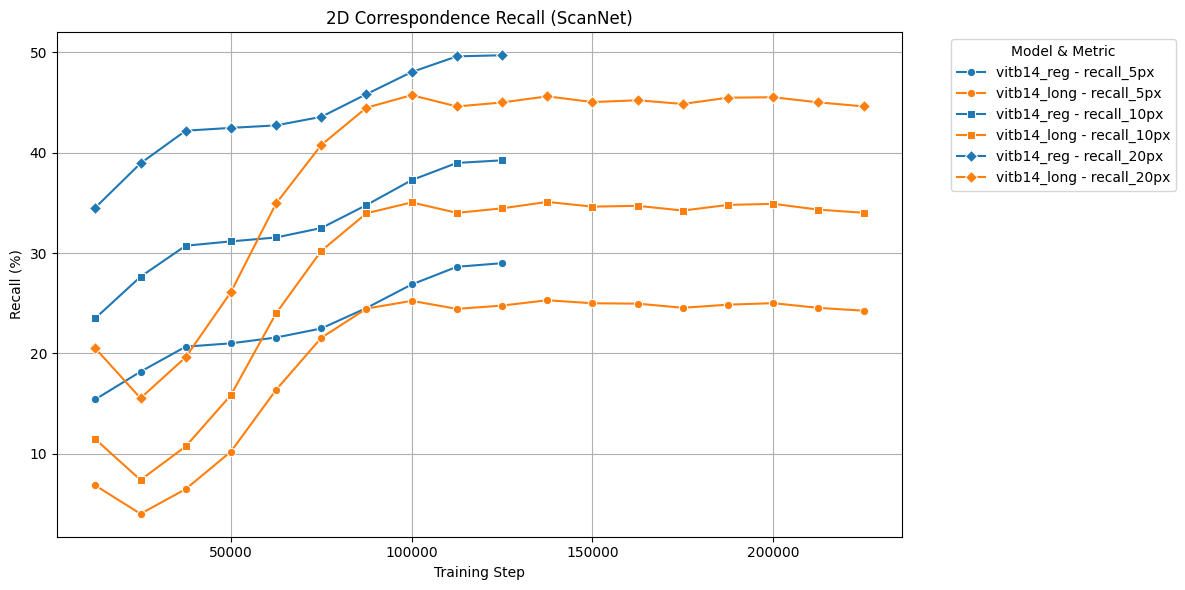

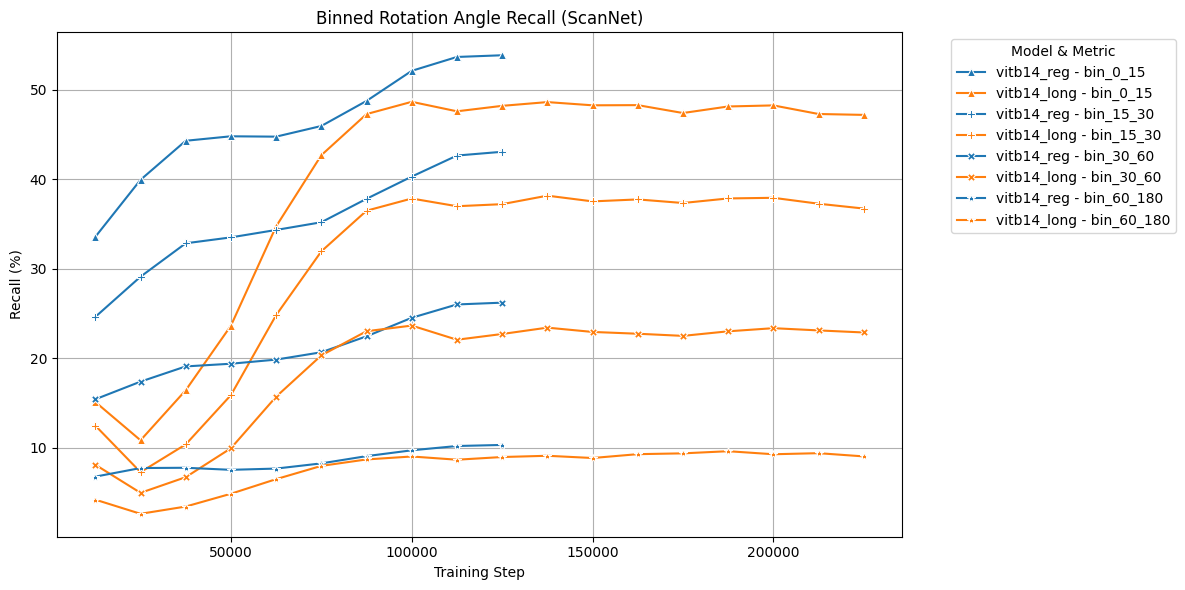

In [6]:
# Ensure consistent order
df_filtered = df[df['model'].str.contains('dinov2_vitb14_reg-outputs_b14|dinov2_vitb14-outputs_b14_long')].copy()
df_filtered['model_type'] = df_filtered['model'].apply(
    lambda x: 'vitb14_reg' if 'reg' in x else 'vitb14_long'
)

# Define styles
model_palette = {
    'vitb14_reg': 'tab:blue',
    'vitb14_long': 'tab:orange'
}
marker_styles = {
    'recall_5px': 'o',
    'recall_10px': 's',
    'recall_20px': 'D',
    'bin_0_15': '^',
    'bin_15_30': 'P',
    'bin_30_60': 'X',
    'bin_60_180': '*'
}

# Plotting helper
def plot_metric_group(metrics, title):
    plt.figure(figsize=(12, 6))
    for metric in metrics:
        for model_type in model_palette.keys():
            subset = df_filtered[df_filtered['model_type'] == model_type]
            sns.lineplot(
                data=subset,
                x='step',
                y=metric,
                label=f"{model_type} - {metric}",
                marker=marker_styles[metric],
                color=model_palette[model_type]
            )
    plt.title(title)
    plt.xlabel('Training Step')
    plt.ylabel('Recall (%)')
    # plt.legend(title='Model & Metric', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', frameon=True, fancybox=True, framealpha=0.5)
    plt.legend(title='Model & Metric', loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
# def plot_scannet_metrics(metrics, title):
#     plt.figure(figsize=(12, 6))
#     for metric in metrics:
#         for model_type in df_scannet['model_type'].unique():
#             subset = df_scannet[df_scannet['model_type'] == model_type]
#             sns.lineplot(
#                 data=subset,
#                 x='step',
#                 y=metric,
#                 label=f"{model_type} - {metric}",
#                 marker=marker_styles[metric],
#                 color=model_palette[model_type]
#             )
#     plt.title(title)
#     plt.xlabel('Training Step')
#     plt.ylabel('Recall (%)')
#     plt.grid(True)
#     plt.legend(title='Model & Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()

# Plot 2D Recall
plot_metric_group(['recall_5px', 'recall_10px', 'recall_20px'], '2D Correspondence Recall (ScanNet)')

# Plot Rotation Angle Binned Recall
plot_metric_group(['bin_0_15', 'bin_15_30', 'bin_30_60', 'bin_60_180'], 'Binned Rotation Angle Recall (ScanNet)')